# Project 2- Inflation News Market Influence & Stock Prediction 

## Analyzing what effect (if any) inflation news has had on the stock market and if this news has influenced investor’s trading decisions.

## Part 1- Inflation News Market Influence & Performance Analysis

## Has a rise in inflation had any effect on the stock market?

### ETFs to analyze:
* SPY (Overall)- Chose SPY as a benchmark to see how the overall market performed
* GLD (Commodity)- Chose GLD because in times of rising inflation, the demand and price for goods and services increases, as does the price of the commodities used to produce those goods and services
* XLRE (Real Estate)- Chose XLRE because assets with adjustable cash flows (property rental income) tend to perform better with rising inflation
* USO (Oil)- Chose USO because energy-related commodities like oil have a strong relationship with inflation

In [1]:
# Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
# Read SPY Data and get rid of extra columns 
SPY_Data= pd.read_csv("SPY2.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
SPY_Data = SPY_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
SPY_Data.head()

,Close
Date,
2020-11-02,330.200012
2020-11-03,336.029999
2020-11-04,343.540009
2020-11-05,350.239990
2020-11-06,350.160004


In [3]:
# Read GLD Data and get rid of extra columns 
GLD_Data= pd.read_csv("GLD.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
GLD_Data = GLD_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
GLD_Data.head()

,Close
Date,
2020-11-02,177.910004
2020-11-03,178.919998
2020-11-04,178.820007
2020-11-05,182.929993
2020-11-06,183.190002


In [4]:
# Read XLRE Data and get rid of extra columns 
XLRE_Data= pd.read_csv("XLRE.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
XLRE_Data = XLRE_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
XLRE_Data.head()

,Close
Date,
2020-11-02,34.990002
2020-11-03,35.540001
2020-11-04,35.639999
2020-11-05,35.770000
2020-11-06,35.630001


In [5]:
# Read USO Data and get rid of extra columns 
USO_Data= pd.read_csv("USO.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
USO_Data = USO_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
USO_Data.head()

,Close
Date,
2020-11-02,26.260000
2020-11-03,26.719999
2020-11-04,27.440001
2020-11-05,27.160000
2020-11-06,26.469999


In [6]:
# Check data types
SPY_Data.dtypes

Close    float64
dtype: object

In [7]:
GLD_Data.dtypes

Close    float64
dtype: object

In [8]:
XLRE_Data.dtypes

Close    float64
dtype: object

In [9]:
USO_Data.dtypes

Close    float64
dtype: object

In [10]:
# Calculate SPY Daily Returns
SPY_Returns= SPY_Data.pct_change()
SPY_Returns.head()

,Close
Date,
2020-11-02,NaN
2020-11-03,0.017656
2020-11-04,0.022349
2020-11-05,0.019503
2020-11-06,-0.000228


In [11]:
# Rename `Close` Column to be specific to this stock and drop nulls.
SPY_Returns.columns=["SPY"]
SPY_Returns.dropna(inplace=True)
SPY_Returns.head()

,SPY
Date,
2020-11-03,0.017656
2020-11-04,0.022349
2020-11-05,0.019503
2020-11-06,-0.000228
2020-11-09,0.012566


In [12]:
# Calculate GLD Daily Returns
GLD_Returns= GLD_Data.pct_change()
GLD_Returns.head()

,Close
Date,
2020-11-02,NaN
2020-11-03,0.005677
2020-11-04,-0.000559
2020-11-05,0.022984
2020-11-06,0.001421


In [13]:
# Rename `Close` Column to be specific to this stock and drop nulls.
GLD_Returns.columns=["GLD"]
GLD_Returns.dropna(inplace=True)
GLD_Returns.head()

,GLD
Date,
2020-11-03,0.005677
2020-11-04,-0.000559
2020-11-05,0.022984
2020-11-06,0.001421
2020-11-09,-0.044271


In [14]:
# Calculate XLRE Daily Returns
XLRE_Returns= XLRE_Data.pct_change()
XLRE_Returns.head()

,Close
Date,
2020-11-02,NaN
2020-11-03,0.015719
2020-11-04,0.002814
2020-11-05,0.003648
2020-11-06,-0.003914


In [15]:
# Rename `Close` Column to be specific to this stock and drop nulls.
XLRE_Returns.columns=["XLRE"]
XLRE_Returns.dropna(inplace=True)
XLRE_Returns.head()

,XLRE
Date,
2020-11-03,0.015719
2020-11-04,0.002814
2020-11-05,0.003648
2020-11-06,-0.003914
2020-11-09,0.026382


In [16]:
# Calculate USO Daily Returns
USO_Returns= USO_Data.pct_change()
USO_Returns.head()

,Close
Date,
2020-11-02,NaN
2020-11-03,0.017517
2020-11-04,0.026946
2020-11-05,-0.010204
2020-11-06,-0.025405


In [17]:
# Rename `Close` Column to be specific to this stock and drop nulls.
USO_Returns.columns=["USO"]
USO_Returns.dropna(inplace=True)
USO_Returns.head()

,USO
Date,
2020-11-03,0.017517
2020-11-04,0.026946
2020-11-05,-0.010204
2020-11-06,-0.025405
2020-11-09,0.060446


## Conduct Quantitative Analysis

### Performance Analysis

In [18]:
# Join SPY Returns, GLD Returns, XLRE Returns and USO Returns into a single DataFrame with columns for each stock's returns.
Combined_Returns = pd.concat([SPY_Returns, GLD_Returns, XLRE_Returns, USO_Returns], axis='columns', join='inner')
Combined_Returns.dropna(inplace=True)
Combined_Returns.head()

,SPY,GLD,XLRE,USO
Date,,,,
2020-11-03,0.017656,0.005677,0.015719,0.017517
2020-11-04,0.022349,-0.000559,0.002814,0.026946
2020-11-05,0.019503,0.022984,0.003648,-0.010204
2020-11-06,-0.000228,0.001421,-0.003914,-0.025405
2020-11-09,0.012566,-0.044271,0.026382,0.060446


In [19]:
# Plot cumulative returns with an hvplot
Combined_Returns.hvplot.line(xlabel="Date", ylabel="Daily Return", width= 1000)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:title={'center':'Combined Returns of SPY, GLD, XLRE and USO'}, xlabel='Date'>

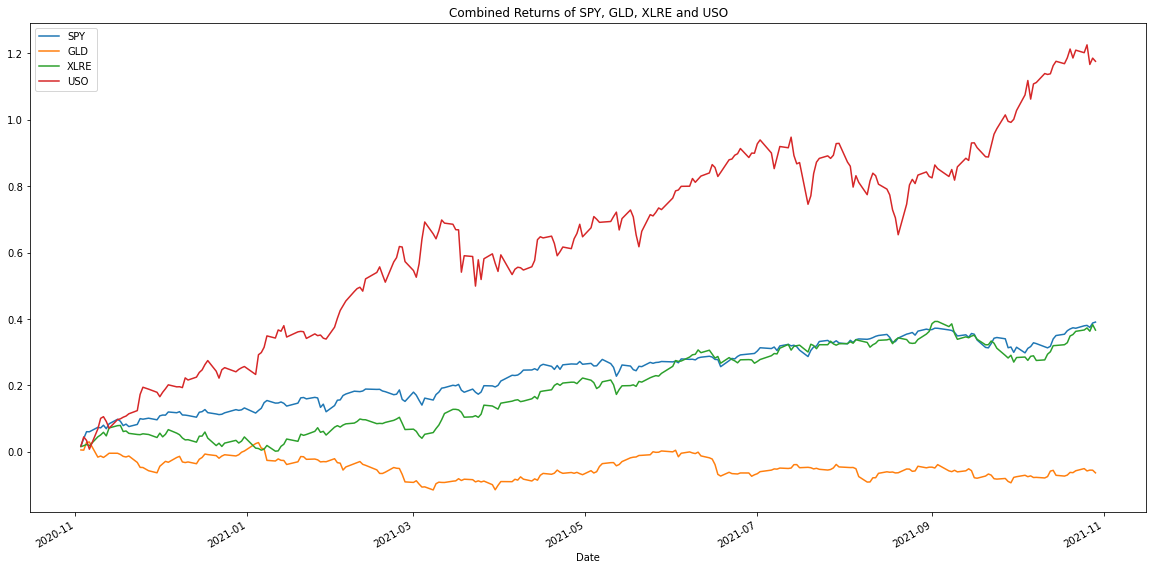

In [20]:
# Calculate and plot cumulative returns of the combined returns
Combined_Returns = (1 + Combined_Returns.sort_index()).cumprod()-1
# Plot cumulative returns
Combined_Returns.plot(figsize=(20,10), title= "Combined Returns of SPY, GLD, XLRE and USO")

<AxesSubplot:title={'center':'One Year Returns of United States Oil Fund USO'}, xlabel='Date', ylabel='Daily Return'>

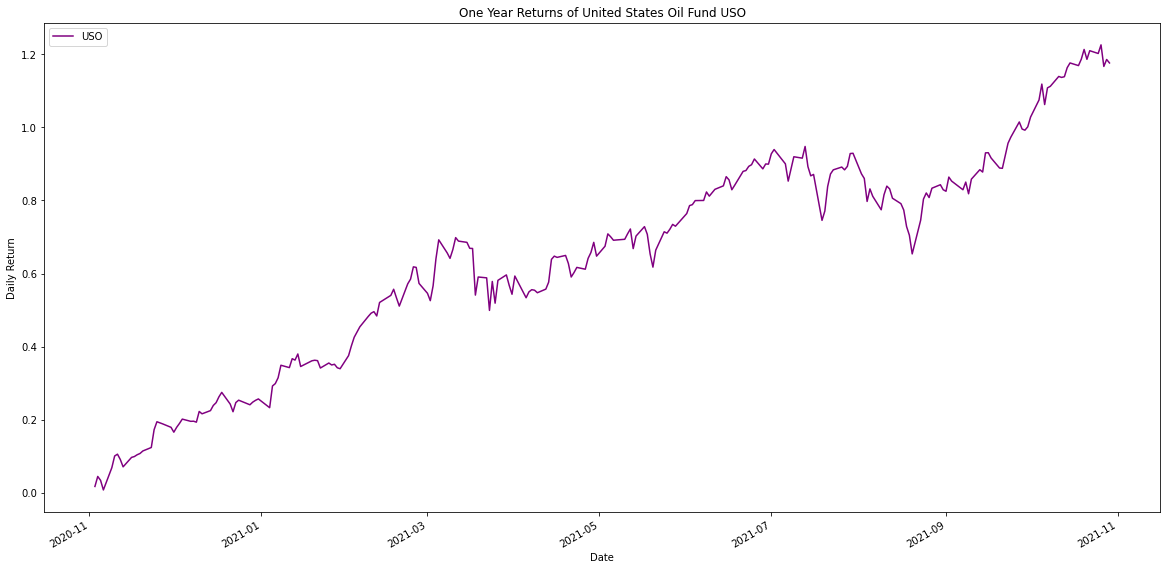

In [21]:
# Based on the Combined Results chart, which stock performed the best?
USO_Returns = (1 + USO_Returns.sort_index()).cumprod()-1
# Plot best performing chart returns
USO_Returns.plot(figsize=(20,10), xlabel="Date", ylabel="Daily Return", title= "One Year Returns of United States Oil Fund USO", color= "purple")


## US Inflation Chart
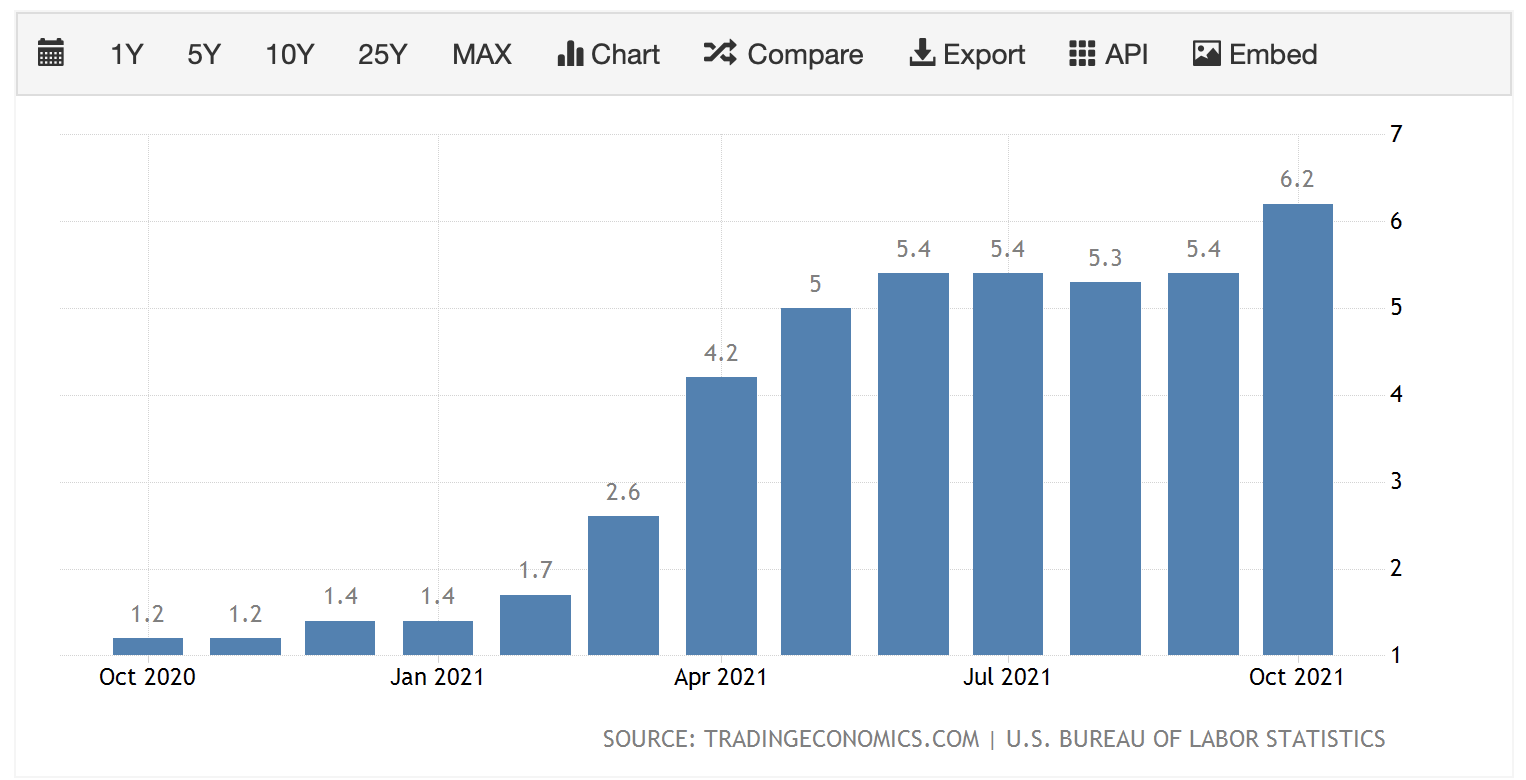

## Analyze the best performing stock vs the change in inflation over the time period

### Oil (USO) outperformed the overall market (SPY), gold (GLD) and real estate (XLRE) stocks which proves that, as stated above, oil does have a strong relationship with inflation. This is not surprising because oil is vital for producing and transporting goods and when inflation rises, so does the demand and price for goods and services. 

* **October 2020- February 2021: 1.2%- 1.7%:** This is a 0.5% increase in inflation, USO returns increase by 0.573% 
* **March 2021- April 2021: 2.6%- 4.2%:** This is a 1.6% increase in inflation, USO returns increase by 0.068% 
* **May 2021- July 2021: 5%- 5.4%:** This is a 0.4% increase in inflation, USO returns increase by 0.115% 
* **August 2021- October 2021: 5.3%- 6.2%:** This is a 0.9% increase in inflation, USO returns increase by 0.19% 

## Based on the performance analysis of USO, create a portfolio simulation 

### Investor Profile

* Risk tolerance- high
* Age- 30
* Time horizon- 30 years
* Asset type- various
* Investment amount- $100,000

## Because the investor is optimistic about the market, create a long-position algorithm

### We want the trading algorithm to identify the trading signals that indicate opportunities to buy USO stock, so we need to identify the times when the short-window SMA is greater than the long-window SMA. When this happens, the price trend for USO stock is moving upward in the short term and we want to own USO stock during this time.

### Our performance analysis time-period is during Covid-19 which has had extreme effects on the market. Therefore, we will extend our time-period for the simulation to include a time before Covid, so the results are not misleading. The new time-period will be 10/31/18-10/31/21.

In [22]:
# Import the required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

In [23]:
# Create a DataFrame filtering only the index and Close columns
USO_df = pd.read_csv(("USO2.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
USO_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-31,111.919998,113.040001,110.160004,110.320000,110.320000,3998850
2018-11-01,110.879997,110.879997,106.959999,107.680000,107.680000,4506738
2018-11-02,107.360001,108.160004,106.239998,106.480003,106.480003,3595175
2018-11-05,107.919998,108.720001,106.320000,106.400002,106.400002,2456175
2018-11-06,107.120003,107.360001,103.919998,105.440002,105.440002,3702325


In [24]:
# Filter the date index and close columns
signals_USO_df = USO_df.loc[:,["Close"]]

# Review the DataFrame
signals_USO_df.head()

,Close
Date,
2018-10-31,110.320000
2018-11-01,107.680000
2018-11-02,106.480003
2018-11-05,106.400002
2018-11-06,105.440002


In [25]:
signals_USO_df.hvplot()

:Curve   [Date]   (Close)

In [26]:
# Set the short_window (50) and long window (100) variables
short_window = 50
long_window = 100

In [27]:
# Generate the short and long moving averages (50 and 100 days, respectively)
signals_USO_df['SMA50'] = signals_USO_df['Close'].rolling(window=short_window).mean()
signals_USO_df['SMA100'] = signals_USO_df['Close'].rolling(window=long_window).mean()

# Review the DataFrame
signals_USO_df.head()

,Close,SMA50,SMA100
Date,,,
2018-10-31,110.320000,NaN,NaN
2018-11-01,107.680000,NaN,NaN
2018-11-02,106.480003,NaN,NaN
2018-11-05,106.400002,NaN,NaN
2018-11-06,105.440002,NaN,NaN


In [28]:
# Review the DataFrame
signals_USO_df.tail()

,Close,SMA50,SMA100
Date,,,
2021-10-25,57.830002,51.3828,50.1319
2021-10-26,58.450001,51.6110,50.2438
2021-10-27,56.900002,51.8174,50.3401
2021-10-28,57.400002,52.0574,50.4353
2021-10-29,57.150002,52.3050,50.5310


In [29]:
# Create a column to hold the trading signal
signals_USO_df["Signal"] = 0.0

In [30]:
# Generate the trading signal 0 or 1,
# where 1 is the short-window (SMA50) greater than the long-window (SMA100)
# and 0 is when the condition is not met

signals_USO_df["Signal"][short_window:] = np.where(signals_USO_df["SMA50"][short_window:] > signals_USO_df["SMA100"][short_window:], 1.0, 0.0)

# Review the DataFrame
signals_USO_df.tail(15)

,Close,SMA50,SMA100,Signal
Date,,,,
2021-10-11,56.180000,49.5230,48.9368,1.0
2021-10-12,56.110001,49.6616,49.0731,1.0
2021-10-13,56.160000,49.8078,49.1977,1.0
2021-10-14,56.810001,50.0000,49.3156,1.0
2021-10-15,57.150002,50.1810,49.4379,1.0
2021-10-18,56.959999,50.3688,49.5555,1.0
2021-10-19,57.419998,50.5852,49.6742,1.0
2021-10-20,58.119999,50.7940,49.8012,1.0
2021-10-21,57.410000,50.9762,49.9120,1.0


In [31]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
signals_USO_df["Entry/Exit"] = signals_USO_df["Signal"].diff()

# Slice the DataFrame to confirm the Signal
# Review the DataFrame
signals_USO_df.loc["2019-06-25":"2019-07-10"] 

,Close,SMA50,SMA100,Signal,Entry/Exit
Date,,,,,
2019-06-25,96.000000,98.7616,97.8104,1.0,0.0
2019-06-26,98.320000,98.6096,97.8632,1.0,0.0
2019-06-27,98.320000,98.4368,97.9264,1.0,0.0
2019-06-28,96.320000,98.2384,97.9864,1.0,0.0
2019-07-01,98.239998,98.0720,98.0632,1.0,0.0
2019-07-02,93.599998,97.7568,98.1136,0.0,-1.0
2019-07-03,94.160004,97.4336,98.1688,0.0,0.0
2019-07-05,95.599998,97.1568,98.2440,0.0,0.0
2019-07-08,95.440002,96.9008,98.3056,0.0,0.0


In [32]:
# Visualize exit position relative to close price
exit = signals_USO_df[signals_USO_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

In [33]:
# Show the plot
exit

:Scatter   [Date]   (Close)

In [34]:
# Visualize entry position relative to close price
entry = signals_USO_df[signals_USO_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

In [35]:
# Show the plot
entry

:Scatter   [Date]   (Close)

In [36]:
# Visualize close price for the investment
security_close = signals_USO_df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400)

# Show the plot
security_close

:Curve   [Date]   (Close)

In [37]:
# Visualize moving averages
moving_avgs = signals_USO_df[['SMA50', 'SMA100']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400)

# Show the plot
moving_avgs

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [38]:
# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="USO - SMA50, SMA100, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

### Summary

* With the overlay plot, we can identify the trading signals from the algorithm. Specifically, the green, upward-pointing arrows indicate the entry points, and the red, downward-pointing arrows indicate the exit points. 
* This algorithm can recognize the crossover points of the long- and short-window SMAs. A trade was entered when the “SMA50” value crossed above the “SMA100” value, and the trade was exited when the “SMA50” value crossed below the “SMA100” value.
* This trading strategy is called a long position because it focuses on first buying the stock, then holding it, and then selling it only when the short-term price trend turns lower. The investor makes a profit using the “buy low, sell high” strategy.

## Backtesting the Algorithm

### Now that we've built the algorithm, we can backtest its profitability. Backtesting is a method that allows us to assess how well a strategy works retrospectively, using historical data to validate how accurately the strategy would have predicted the actual results.

In [39]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

In [40]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
signals_USO_df["Position"] = share_size * signals_USO_df["Signal"]

In [41]:
# Determine the points in time where a 500 share position is bought or sold
signals_USO_df["Entry/Exit Position"] = signals_USO_df["Position"].diff()

In [42]:
# Multiply the close price by the number of shares held
signals_USO_df["Portfolio Holdings"] = signals_USO_df["Close"] * signals_USO_df["Position"]

In [43]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
signals_USO_df["Portfolio Cash"] = initial_capital - (signals_USO_df["Close"] * signals_USO_df["Entry/Exit Position"]).cumsum() 


In [44]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
signals_USO_df["Portfolio Total"] = signals_USO_df["Portfolio Cash"] + signals_USO_df["Portfolio Holdings"]

In [45]:
# Calculate the portfolio daily returns
signals_USO_df["Portfolio Daily Returns"] = signals_USO_df["Portfolio Total"].pct_change()

In [46]:
# Calculate the portfolio cumulative returns
signals_USO_df["Portfolio Cumulative Returns"] = (1 + signals_USO_df["Portfolio Daily Returns"]).cumprod() - 1

In [47]:
# Print the DataFrame
signals_USO_df.head(200)

,Close,SMA50,SMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,,,,
2018-10-31,110.320000,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2018-11-01,107.680000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0000,100000.0000,NaN,NaN
2018-11-02,106.480003,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0000,100000.0000,0.0,0.0000
2018-11-05,106.400002,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0000,100000.0000,0.0,0.0000
2018-11-06,105.440002,NaN,NaN,0.0,0.0,0.0,0.0,0.0,100000.0000,100000.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-13,94.959999,92.9984,97.9296,0.0,0.0,0.0,0.0,0.0,97439.9985,97439.9985,0.0,-0.0256
2019-08-14,91.519997,93.0432,97.8664,0.0,0.0,0.0,0.0,0.0,97439.9985,97439.9985,0.0,-0.0256
2019-08-15,90.800003,93.1360,97.7944,0.0,0.0,0.0,0.0,0.0,97439.9985,97439.9985,0.0,-0.0256


In [48]:
# Visualize exit position relative to total portfolio value
exit = signals_USO_df[signals_USO_df["Entry/Exit"] == -1.0]["Portfolio Total"].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel="Total Portfolio Value",
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = signals_USO_df[signals_USO_df["Entry/Exit"] == 1.0]["Portfolio Total"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    ylabel="Total Portfolio Value",
    width=1000,
    height=400
)

# Visualize the value of the total portfolio
total_portfolio_value = signals_USO_df[["Portfolio Total"]].hvplot(
    line_color='lightgray',
    ylabel="Total Portfolio Value",
    xlabel="Date",
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="USO Algorithm - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [49]:
# View max value of the portfolio total during the period
signals_USO_df.loc["2019-04-23","Portfolio Total"]

105799.9995

In [50]:
# View final value of the portfolio total
signals_USO_df.loc["2021-10-29","Portfolio Total"]

97479.99700000002

### Interpreting Backtest Results from the Overlay Plot

* The Overlay Plot highlights the fact that the total value of the portfolio changed with each entry and exit of a 500-share position in USO.

* The trading algorithm lost about 2,520 during the backtesting period overall, leaving us with a final portfolio value of 97,480. However, the loss was not consistent, the portfolio fluctuated and gained as much as 5,800.

* Visualizing the potential upside and downside of an algorithm over time is just as important as measuring the profitability of any particular trade. In this case, if we relied on the initial time-period where inflation was high, the returns would be misleading for the investor. Overall trade performance was quite volatile which further shows that inflation news does have a strong relationship with oil because when inflation was lower or "normal", we see that USO did not perform as well. 

* Based on this visual information, normally it would not be wise to use this algorithm—or buy this stock- for the portfolio of an investor who is risk averse or has a short-term time horizon, as there are lengthy periods in this algorithm when an investor would have experienced losses before eventually realizing a profit. However, because our investor is risk tolerant and has a long-term time horizon, I would recommend this stock for their portfolio. If nothing else, this stock provides a good hedging strategy for when the overall market is down.  

## Calculate the portfolio performance metrics that will offer insight into the risk/reward characteristics of our trading algorithm.

In [51]:
# Create a list for the column name
columns = ["Backtest"]

# Create a list holding the names of the new evaluation metrics
metrics = [
    "Annualized Return",
    "Cumulative Returns",
    "Annual Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"]

# Initialize the DataFrame with index set to the evaluation metrics and the column
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)

# Review the DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [52]:
# Calculate annualized return
portfolio_evaluation_df.loc["Annualized Return"] = (
    signals_USO_df["Portfolio Daily Returns"].mean() * 252
)

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,-0.00594
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [53]:
# Calculate cumulative return
portfolio_evaluation_df.loc["Cumulative Returns"] = signals_USO_df["Portfolio Cumulative Returns"][-1]

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,-0.00594
Cumulative Returns,-0.0252
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [54]:
# Calculate annual volatility
portfolio_evaluation_df.loc["Annual Volatility"] = (
    signals_USO_df["Portfolio Daily Returns"].std() * np.sqrt(252)
)

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,-0.00594
Cumulative Returns,-0.0252
Annual Volatility,0.072035
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [55]:
# Calculate Sharpe ratio
portfolio_evaluation_df.loc["Sharpe Ratio"] = (
    signals_USO_df["Portfolio Daily Returns"].mean() * 252) / (
    signals_USO_df["Portfolio Daily Returns"].std() * np.sqrt(252)
)

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,-0.00594
Cumulative Returns,-0.0252
Annual Volatility,0.072035
Sharpe Ratio,-0.082467
Sortino Ratio,NaN


In [56]:
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = signals_USO_df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

In [57]:
# Review the portfolio evaluation DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,-0.00594
Cumulative Returns,-0.0252
Annual Volatility,0.072035
Sharpe Ratio,-0.082467
Sortino Ratio,-0.10585


### Evaluate the Metrics

* Annualized return- represents the expected ROI over a time-period of one year. In this case, the dollar value of the portfolio should **decrease** by about **0.59%** each year.
* Cumulative returns- represents the percentage gain or percentage loss for an investment across the entire investment. In this case, the dollar value of the portfolio **decreased** by approximately **2.52%** over the backtesting period.
* Annual volatility- represents the standard deviation of the asset’s daily return values measured on an annualized basis. The annual volatility of the portfolio has a spread of about 7.20% surrounding the annualized return. This means that the portfolio might **return** as much as **6.61%** (-0.59% + 7.20%) or **lose** as much as **7.79%** (-0.59% − 7.20%) per year.
* Sharpe Ratio- measures an asset's outperformance as compared to the asset’s volatility where volatility is characterized by the standard deviation of its daily return values. The Sharpe ratio is **-0.082**. In general, a higher Sharpe ratio indicates a better risk/reward profile. However, a single Sharpe ratio doesn’t offer much insight. It’s best to compare it with the Sharpe ratios of other portfolios to determine which one offers the best profile. 
* Sortino Ratio- measures the downside volatility of the asset. The Sortino ratio of our portfolio suggests a rate of about **-0.106** for the risk-adjusted annual profitability compared to the annual downside risk. As with the Sharpe ratio, a higher Sortino ratio is better. And, it’s best to compare it with the Sortino ratios of other portfolios.

### Conclusion

Overall, the portfolio did not perform well during the backtesting period, but the losses are not crippling for a risk tolerant investor with a long-time horizon. Once again, this investment works very well as a hedging strategy for when the overall market is down.